In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

Uniform distribution
a=1.00, b=3.00
E(x)=1.997 	 D(x)=0.330


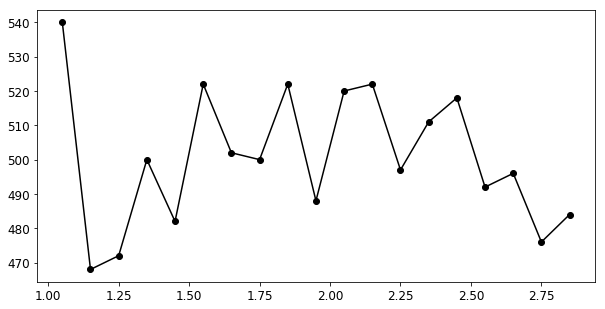

In [2]:
# 均匀分布随机数

# generate random number between 1 and 3 following an uniform density
a = 1.
b = 3.
x = np.random.uniform(a, b, size=10000)

# analyze the random samples with a histogram
xgrid = np.arange(1,3,0.1)   # 从1到3宽度0.1取网格
xcenter = (xgrid[1:]+xgrid[:-1])/2   # 每个网格的中心位置
hx, xedge = np.histogram(x, xgrid)   # 直方图

# draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter, hx, 'ko-')

print('Uniform distribution')
print('a=%(a).2f, b=%(b).2f' %{'a':a, 'b':b})
print('E(x)=%(m).3f \t D(x)=%(d).3f' %{'m':np.mean(x), 'd':np.var(x)})

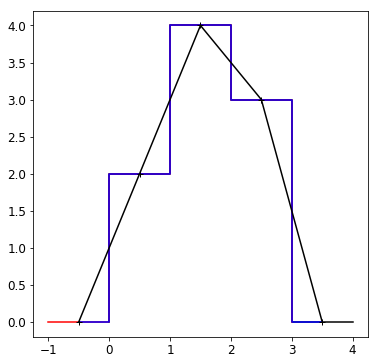

In [3]:
# 三种不同边界的阶梯图作法

fig = plt.figure(figsize=[6,6])
x = np.array([0.2, 0.3, 1.2, 1.6, 1.7, 1.8, 2.4, 2.5, 2.9])
xgrid = np.arange(-1,5,1)
xcenter = (xgrid[1:]+xgrid[:-1])/2
h, xedge = np.histogram(x, bins=xgrid)

ax = fig.add_subplot(111)
ax.step(xedge[1:], h, 'k', where='pre')    # 1
ax.step(xedge[:-1], h, 'r', where='post')  # 2
ax.step(xcenter, h, 'b', where='mid')      # 3
ax.plot(xcenter, h, 'k+-')

Text(0,0.5,'$\\theta$')

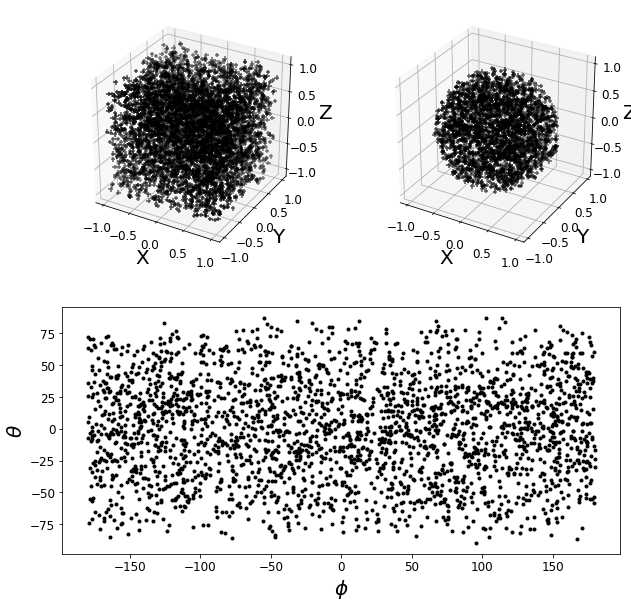

In [4]:
# 如何在一个球面上随机均匀撒点

from mpl_toolkits.mplot3d import Axes3D

# first randomly select x, y, z in 3D cartesian coordinates
x = np.random.uniform(-1, 1, 5000)
y = np.random.uniform(-1, 1, 5000)
z = np.random.uniform(-1, 1, 5000)

# calculate the spheric radii and mark the random samples located within the unit sphere
r = x**2 + y**2 + z**2
ind = r<=1.   # 只取半径1范围内球体中的样本点

# these random samples follow the uniformly distribution in spheric coordinates
x1 = x[ind]
y1 = y[ind]
z1 = z[ind]

# transform the cartesian coordinates to spheric coordinates
# phi stands for the longitude
phi = np.rad2deg(np.arctan2(y1,x1))
# theta stands for the latitude
theta = np.rad2deg(np.arctan(z1/np.sqrt(x1**2+y1**2)))

# draw the samples at each step
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(x, y, z, c='k', marker='+')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(x1, y1, z1, c='k', marker='+')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

ax = fig.add_subplot(2, 2, (3, 4))
ax.plot(phi, theta, '.k')
ax.set_xlabel(r'$\phi$', fontsize=20)
ax.set_ylabel(r'$\theta$', fontsize=20)

Binomial distribution
n=10, p=0.40
E(k)=3.999 	 D(k)=2.395


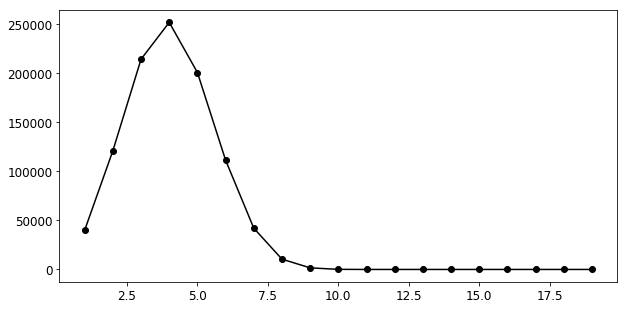

In [5]:
# 二项分布随机数

# generate random number from binomial density 
# with test number of 10 and probability of event of 0.4
n = 10
p = 0.4
x = np.random.binomial(n, p, size=1000000)

# analyze the random samples with a histogram
xgrid = np.arange(0.5,20.5,1)
xcenter = (xgrid[1:]+xgrid[:-1])/2
hx, xedge = np.histogram(x, xgrid)

# draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(xcenter, hx, 'ko-')

print('Binomial distribution')
print('n=%(n)d, p=%(p).2f' %{'n':n, 'p':p})
print('E(k)=%(m).3f \t D(k)=%(d).3f' %{'m':np.mean(x), 'd':np.var(x)})

Normal distribution
mu=1.000, sigma=3.00
E(x)=1.016 	 D(x)=8.929


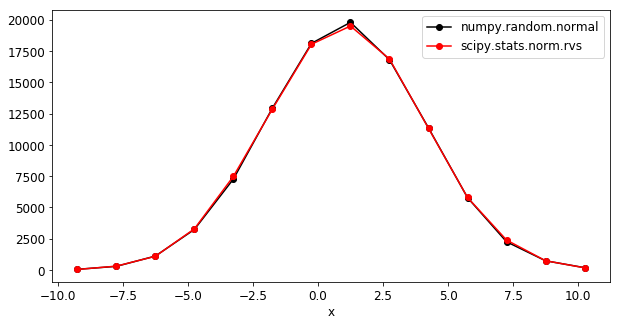

In [6]:
# 正态分布随机数
import scipy.stats as stats

# generate random number following a normal density 
# with location of 1.0 and scale of 3.0
mu = 1.0
sigma2 = 9.0
sigma = np.sqrt(sigma2)
x = np.random.normal(loc=mu, scale=sigma, size=100000)

# use scipy stats to generate random samples
pnorm = stats.norm(loc=mu, scale=sigma)
x2 = pnorm.rvs(size=100000)


# analyze the random samples with a histogram
xgrid = np.arange(-10,12,1.5)
xcenter = (xgrid[1:]+xgrid[:-1])/2
hx, xedge = np.histogram(x, xgrid)
hx2, xedge = np.histogram(x2, xgrid)

# draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter, hx, 'ko-')
e2, = ax.plot(xcenter, hx2, 'ro-')
plt.legend([e1,e2], ['numpy.random.normal','scipy.stats.norm.rvs'], fontsize=12)
ax.set_xlabel('x', fontsize=12)

print('Normal distribution')
print('mu=%(mu).3f, sigma=%(sig).2f' %{'mu':mu, 'sig':sigma})
print('E(x)=%(m).3f \t D(x)=%(d).3f' %{'m':np.mean(x), 'd':np.var(x)})

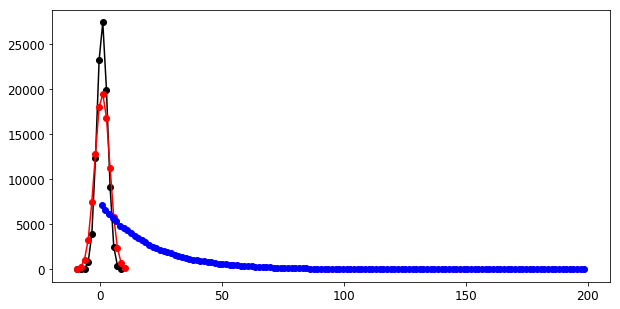

In [7]:
'''
sum of 2 Normal
sum of squared follows chi-2 distribution
'''

y = (x+x2)/2
z = x**2+x2**2

ygrid = np.arange(-10,10,1.5)
ycenter = (ygrid[1:]+ygrid[:-1])/2
hy, yedge = np.histogram(y, ygrid)

zgrid = np.arange(0,200,1.5)
zcenter = (zgrid[1:]+zgrid[:-1])/2
hz, zedge = np.histogram(z, zgrid)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(ycenter, hy, 'ko-')
e2, = ax.plot(xcenter, hx2, 'ro-')
e3, = ax.plot(zcenter, hz, 'bo-')

Text(0,0.5,'$x_2$')

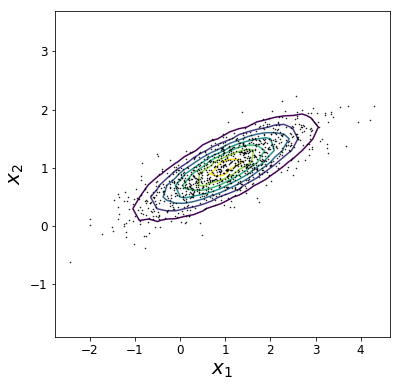

In [8]:
# random draw a sample following a 2D Gaussian distribution

mu = np.array([1., 1.])
s1 = 1.
s2 = 0.2
rho = 0.8
sig = np.array([[s1, rho*np.sqrt(s1*s2)], [rho*np.sqrt(s1*s2), s2]])

# generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu, sig, 100000)
xgrid = np.arange(-2., 4., 0.2)
ygrid = np.arange(-2., 4., 0.2)
xcenter = (xgrid[:-1]+xgrid[1:])/2
ycenter = (ygrid[:-1]+ygrid[1:])/2

# make 2d histogram
hxx, xedge, yedge = np.histogram2d(xx[:,0], xx[:,1], bins=[xgrid, ygrid])

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xx[0:1000,0], xx[0:1000,1], 'k.', markersize=1)
ax.contour(xcenter, ycenter, hxx.T)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)

Acceptance rate 0.09881051897260774


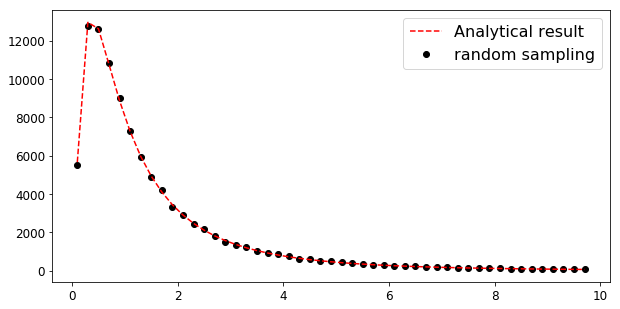

In [9]:
# 拒绝取样

sig = 1
mu = 0

def lognorm(x, mu, sig):
    '''
    log Normal distribution
    '''
    return 1./(np.sqrt(2*np.pi)*sig*x)*np.exp(-(np.log(x)-mu)**2/(2*sig**2))

N = 100000
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0, 10.)   # 0到10均匀分布随机数
    y0 = np.random.rand()            # 0到1均匀分布随机数
    y1 = lognorm(x0, mu, sig)
    if y0<=y1:
        x[i] = x0
        i+=1
    k+=1

xgrid = np.arange(0, 10, 0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2
hx, xedge = np.histogram(x, xgrid)

y = lognorm(xcenter, mu, sig)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter, hx, 'ko')
e2, = ax.plot(xcenter, y/np.sum(y)*sum(hx), 'r--')
plt.legend([e2,e1],['Analytical result','random sampling'], fontsize=16)

print ('Acceptance rate', N/np.float(k))

Acceptance rate 0.039920717455134105


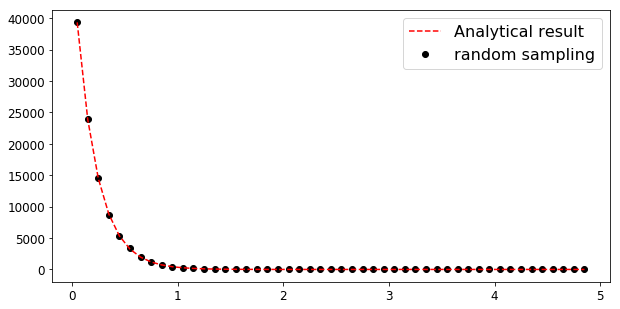

In [10]:
# 指数分布

h = 0.2

# define the density function
def exponential(x, h):
    return 1./h*np.exp(-x/h)

# draw random samples
N = 100000

# rejection sampling
i = 0
k = 0
x = np.zeros((N,1))
while i<N:
    x0 = np.random.uniform(0, 5.) 
    y0 = np.random.rand()/h      
    y1 = exponential(x0, h)
    if y0<=y1:
        x[i] = x0
        i+=1
    k+=1
    
xgrid = np.arange(0, 5, 0.1)
xcenter = (xgrid[0:-1]+xgrid[1:])/2
hx, xedge = np.histogram(x, xgrid)

y = exponential(xcenter, h)

fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter, hx, 'ko')
e2, = ax.plot(xcenter, y/np.sum(y)*sum(hx), 'r--')
plt.legend([e2,e1],['Analytical result','random sampling'], fontsize=16)

print ('Acceptance rate', N/np.float(k))

Acceptance rate: 0.203


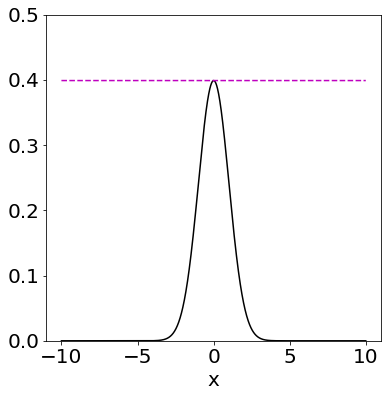

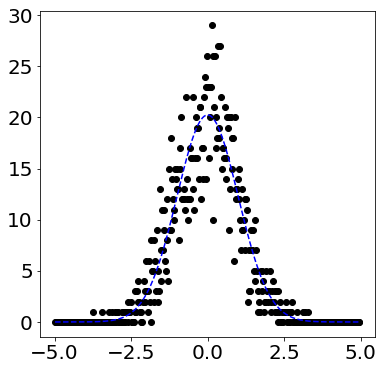

In [12]:
#rejection sampling using a Gaussian as a sample
import numpy as np
import scipy.stats as stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

xgrid = np.arange(-10,10,0.01)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2. 

y = stats.norm.pdf(xcenter,loc=0.,scale=1.)

z_3 = np.repeat(1./(np.sqrt(2*np.pi)*1.),np.shape(y))
z = z_3

N=100000

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,y,'k-')
ax.plot(xcenter,z,'m--')
ax.set_xlabel('x',fontsize=20)
ax.set_ylim([0,0.5])


N=10000
#step 1: draw random numbers from y3
x_rand1 = np.random.uniform(-5.,5.,size=N)
y_rand1 = np.random.uniform(0.,1./np.sqrt(2*np.pi)+0.1,size=N)
x = x_rand1[y_rand1<=stats.norm.pdf(x_rand1,loc=0.,scale=1.)]


xgrid2 = np.arange(-5.,5.,0.025)
xcenter2 = (xgrid2[1:]+xgrid2[0:len(xgrid2)-1])/2. 
hx2,xedge = np.histogram(x,xgrid2)

y2 = stats.norm.pdf(xcenter2,loc=0.,scale=1.)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter2,hx2,'ko')
ax.plot(xcenter2,y2/sum(y2)*sum(hx2),'b--')

print('Acceptance rate:',len(x)/float(N))

Acceptance rate: 0.271


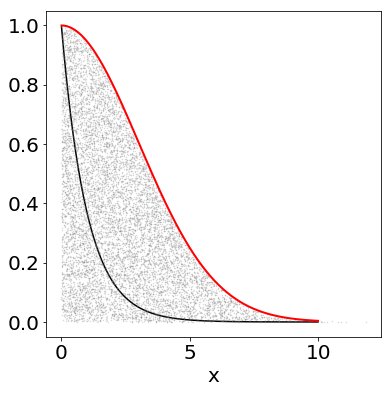

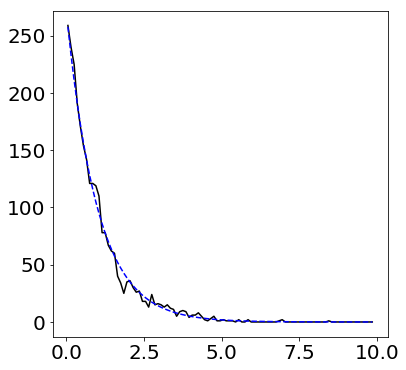

In [13]:
N=10000
xgrid = np.arange(0,10,0.01)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2. 



h = 1.

loc = 0.
scale = 3.

M = np.sqrt(2*np.pi)*scale #so that g(x)*M>p(x)

g_0 = stats.norm.pdf(xcenter,loc=loc,scale=scale)
f_0 = exponential(xcenter,h)

x = np.random.normal(loc=loc,scale=scale,size=2*N) # a draw from g(x)
x = x[x>=0]
N2 = len(x)

f = exponential(x,h)
g = stats.norm.pdf(x,loc=loc,scale=scale)
u = np.random.uniform(0.,1.,size=N2)
x1 = x[u<(f/(M*g))]

xgrid2 = np.arange(0,10,0.1)
xcenter2 = (xgrid2[1:]+xgrid2[0:len(xgrid2)-1])/2. 
hx2,xedge = np.histogram(x1,xgrid2)
f_1 = exponential(xcenter2,h)

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter,f_0,'k-')
ax.plot(x,M*u*g,'.',color=[0.5,0.5,0.5],markersize=1,alpha=0.3)
ax.plot(xcenter,M*g_0,'r-',linewidth=2)

ax.set_xlabel('x',fontsize=20)
#ax.set_ylim([0,0.5])


fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xcenter2,hx2,'k-',markersize=1)
ax.plot(xcenter2,f_1/sum(f_1)*sum(hx2),'b--')
#ax.plot(xcenter,y3/np.sum(y3)*np.sum(hx2),'m-')

print('Acceptance rate:',len(x1)/float(len(x)))